---
title: "Day-13 Random Forest & Gradient Boosting Regression Tree"
categories:
- Python
- Lecture
output:
 html_document:
   keep_md: true
date: '2022-07-05'
---

## 랜덤 포레스트 
- 여러개의 Decision Tree
  - 샘플링
  - Feature Importances
- 예측해야할 행의 갯수 : 100만개
- 컬럼의 갯수 : 200개 --> 100개
  - 나무 100개를 심고 평균을 낸다
  - 나무 1개당 컬럼을 10개로 만든다
  - T1 mae : 20/ T2 mae : 30/ T3 mae : 10,...
    - mean(T1 ~ T100) mae : 20 <- 랜덤포레스트의 평가지표
    - feature importances도 뽑아야 한다.
      - 어떤 조합을 해도 중요한 요소들
    - 샘플링 : 부트스트랩 샘플(복원 추출)
      - 뽑고 다시 넣는다. 
- 분류는 다수결, 예측은 평균
- 각각의 Tree들은 독립되어 있다.

In [83]:
from pandas.core.arrays.categorical import recode_for_categories
# 데이터 불러오기
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier
wine = pd.read_csv('https://bit.ly/wine_csv_data')

# input,target 분리
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

# 데이터 분리
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size = 0.2, random_state=42)

# 모델링
rf = RandomForestClassifier(n_jobs=-1,random_state=42)

# 모델 평가
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']),np.mean(scores['test_score']))

# 특성 중요도
rf.fit(train_input, train_target)
print(rf.feature_importances_)

# OOB 점수
rf = RandomForestClassifier(oob_score = True, n_jobs = -1, random_state = 42)
rf.fit(train_input, train_target)
print(rf.oob_score_)

0.9973541965122431 0.8905151032797809
[0.23167441 0.50039841 0.26792718]
0.8934000384837406


## 그레이디언트 부스팅
- 여러개의 Decision Tree
- 경사하강법의 원리를 이용
- Tree들끼리 유기적이고 상호보완적이다
  - 기존에 했던 알고리즘을 참고해서 가중치를 줘서 다음 알고리즘에 적용해준다
  - 학습을 많이할수록 정확도가 좋아진다.
- 속도가 매우 느리다
  - 대안 : XGBoost, LightGBM

In [84]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']),np.mean(scores['test_score']))

0.8881086892152563 0.8720430147331015


In [85]:
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']),np.mean(scores['test_score']))

0.9464595437171814 0.8780082549788999


- 특성중요도 

In [86]:
gb.fit(train_input, train_target)
print(gb.feature_importances_)

[0.15872278 0.68010884 0.16116839]


## 비지도 학습
- 분류
- 수치적으로 분류
- 분류 후에 사람 라벨링

## 주성분 분석
- Feature Engineering 기법
  - StandardScaler()
- 좌표계 공간 개념
  - 직교 + 회전
- 공분산
- 현 ML의 문제점 : 컬럼의 갯수가 매우 많음
- 원인 : 데이터 수집방법의 다양성
- 차원축소
  - 특성이 많으면 훈련데이터에 쉽게 과대적합된다.
  - 특성을 줄여서 학습 모델의 성능을 향상시킨다.
  - 모델의 학습시간을 감소시켜줌
  - 대포적인 방법몬 : PCA, EFA
- PCA vs EFA
- EFA : 탐색적 요인분석, Factor Analysis
  - ex) 국어 수학 과학 영어
  - 국어 40, 수학 100, 과학 100, 영어 30
  - 국어,영어(언어영역) / 수학,과학(수리영역)
  - 주로 범주형 & 수치 데이터셋
- PCA : 주성분 분석
  - 대표성 찾기(데이터압축)
  - 효율적이고 빠르게 예측 가능
  - ex) 장비1, 장비2, 장비3, 장비4,...,장비N
  - PC1, PC2, PC3, PC4,...,PCN
  - 원래 정보를 알 수 없음
    - 정보손실이 일어남
  - 범주형 데이터셋 X
  - 무조건 수치형 데이터셋에서만 사용
  - PCA 실행 전, 반드시 표준화 처리(스케일링)

- p.320
  - 가장 큰 분산을 찾아서 벡터로 사용
  - 벡터에 수직인 두번쨰로 분산이 큰 방향을 찾는다.
  

In [87]:
# 데이터로드
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2022-07-05 05:05:04--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-07-05 05:05:04--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-07-05 05:05:04--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [88]:
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)
# 300개의 행, 10000개의 열
fruits_2d.shape

(300, 10000)

- PCA

In [89]:
from sklearn.decomposition import PCA
# components값만큼 압축
pca = PCA(n_components = 50)
pca.fit(fruits_2d)

# 주성분은 components_에 저장
print(pca.components_.shape)
# 비정형 데이터는 앞에가 바뀐다.

(50, 10000)


In [95]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다. 
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

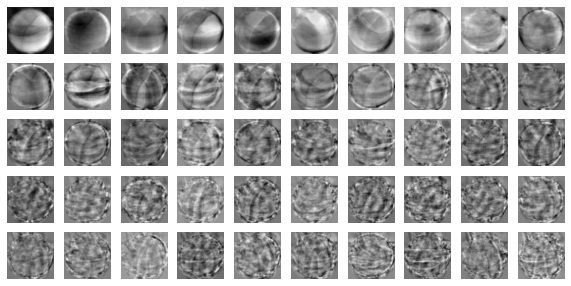

In [103]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

- transform

In [94]:
# 머신러닝에서 칼럼의 갯수를 10000개 -> 50개(전부 수치데이터)
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


- 압축된 데이터를 기반으로 훈련데이터, 테스트데이터 분리 

## 설명된 분산
- 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값 

In [97]:
# 원본데이터의 92%의 분산값을 가지고있다.
# 압축된 데이터를 원본데이터로 복구 시키면 92%일치
print(np.sum(pca.explained_variance_ratio_))

0.9214899630097539


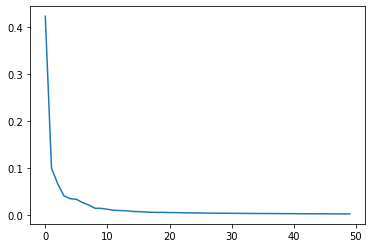

In [104]:
plt.plot(pca.explained_variance_ratio_)
plt.show()
# PC0 ~ PC20까지 84%의 비율을 가지고있다.

In [105]:
print(np.sum(pca.explained_variance_ratio_[:20]))

0.8416602362435645


- PCA로 훈련 데이터의 차원을 축소하면 저장공간 뿐만 아니라 머신러닝 모델의 훈련속도도 높일 수 있다.
  - 정확도는 비슷하다